# 支持向量机

## 线性支持向量机分类

In [3]:
# 在鸢尾花数据集上训练线性SVM

from sklearn import datasets
import numpy as np

iris = datasets.load_iris()

X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.int)

In [6]:
# 对特征值进行标准化

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm_clf = Pipeline([
    ("scale", StandardScaler()),
    ("linear_svc", LinearSVC(loss="hinge", C=1))
])
svm_clf.fit(X, y)

# 预测
svm_clf.predict([[4.8, 1.7]])

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

## 非线性支持向量机分类

### 卫星数据集上的分类

data shape:  (100, 2) (100,)


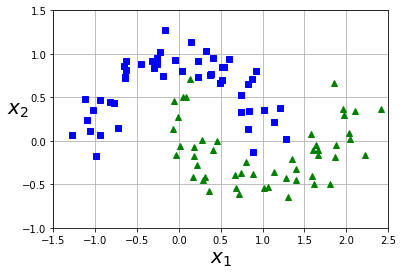

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# 查看数据集
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.15, random_state=42) # make_moon可以随机生成聚类和分类算法的数据集

print("data shape: ", X.shape, y.shape)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # bs blue square
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") # g^ green trigle
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20) # label支持latex表达式
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [84]:
# 从图像上看数据是非线性可分的, 尝试将特征转换成高阶多项式, 变成线性可分

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

poly_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("svm", LinearSVC(C=10, loss="hinge"))   # C越大, 分类间隔越小
])

poly_svm_clf.fit(X, y)

poly_svm_clf.predict([[1,1]])
poly_svm_clf.decision_function([[0.2,0.6]])

/root/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


array([0.00255873])

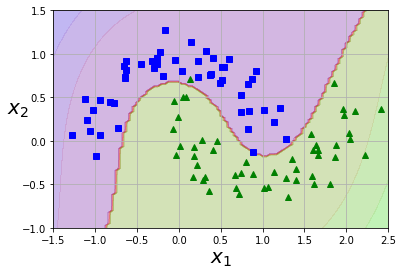

In [54]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) # x0轴范围内生成固定间隔的100个点
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s) # x0 与 x1 两两配对生成(网格)坐标矩阵
    X = np.c_[x0.ravel(), x1.ravel()] # flatten以后再组合成 N*2维矩阵, N是样本个数100, 2是两个特征值
    y_pred = clf.predict(X).reshape(x0.shape) # 预测出来的值转成 网格的形状
    y_decision = clf.decision_function(X).reshape(x0.shape) # 决策分数转成网格形状, 决策分数>=0为正例, 如果是硬间隔需要>=1(<=-1)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

### 使用多项式核

In [56]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly_kernel10_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly_kernel10_svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svm_clf',
                 SVC(C=5, cache_size=200, class_weight=None, coef0=100,
                     decision_function_shape='ovr', degree=10,
                     gamma='auto_deprecated', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

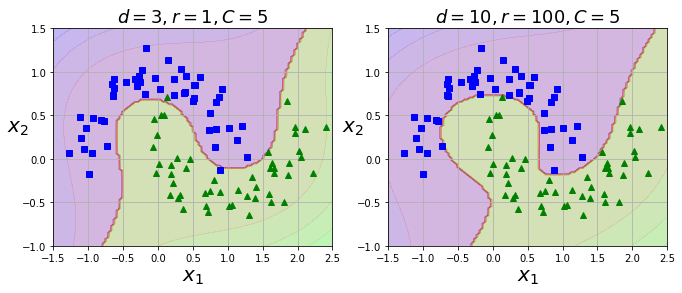

In [60]:
plt.figure(figsize=(11, 4))

plt.subplot(121) # 121 - 1行2列图像网格中的第1个
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122) # 121 - 1行2列图像网格中的第2个
plot_predictions(poly_kernel10_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()